# 5ª Etapa Concluída

### Regressão logistica e exploração de caracteristicas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 400

In [2]:
df = pd.read_csv('Capitulo_1_arquivo_limpo.csv')

In [3]:
features_response = df.columns.tolist()

In [4]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [5]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [6]:
# removendo itens que não utilizaremos da variavel features_response
excl_itens = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
             'EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [8]:
# criando uma list comprehension  para remover os itens
features_response = [item for item in features_response if item not in excl_itens]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

## Correlação de Pearson ou Correlação Linear

In [9]:
# criando uma nova variável
corr = df[features_response].corr()
corr.iloc[0:5, 0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


### Plotando a matriz de correlação usando o Seaborn

<AxesSubplot:>

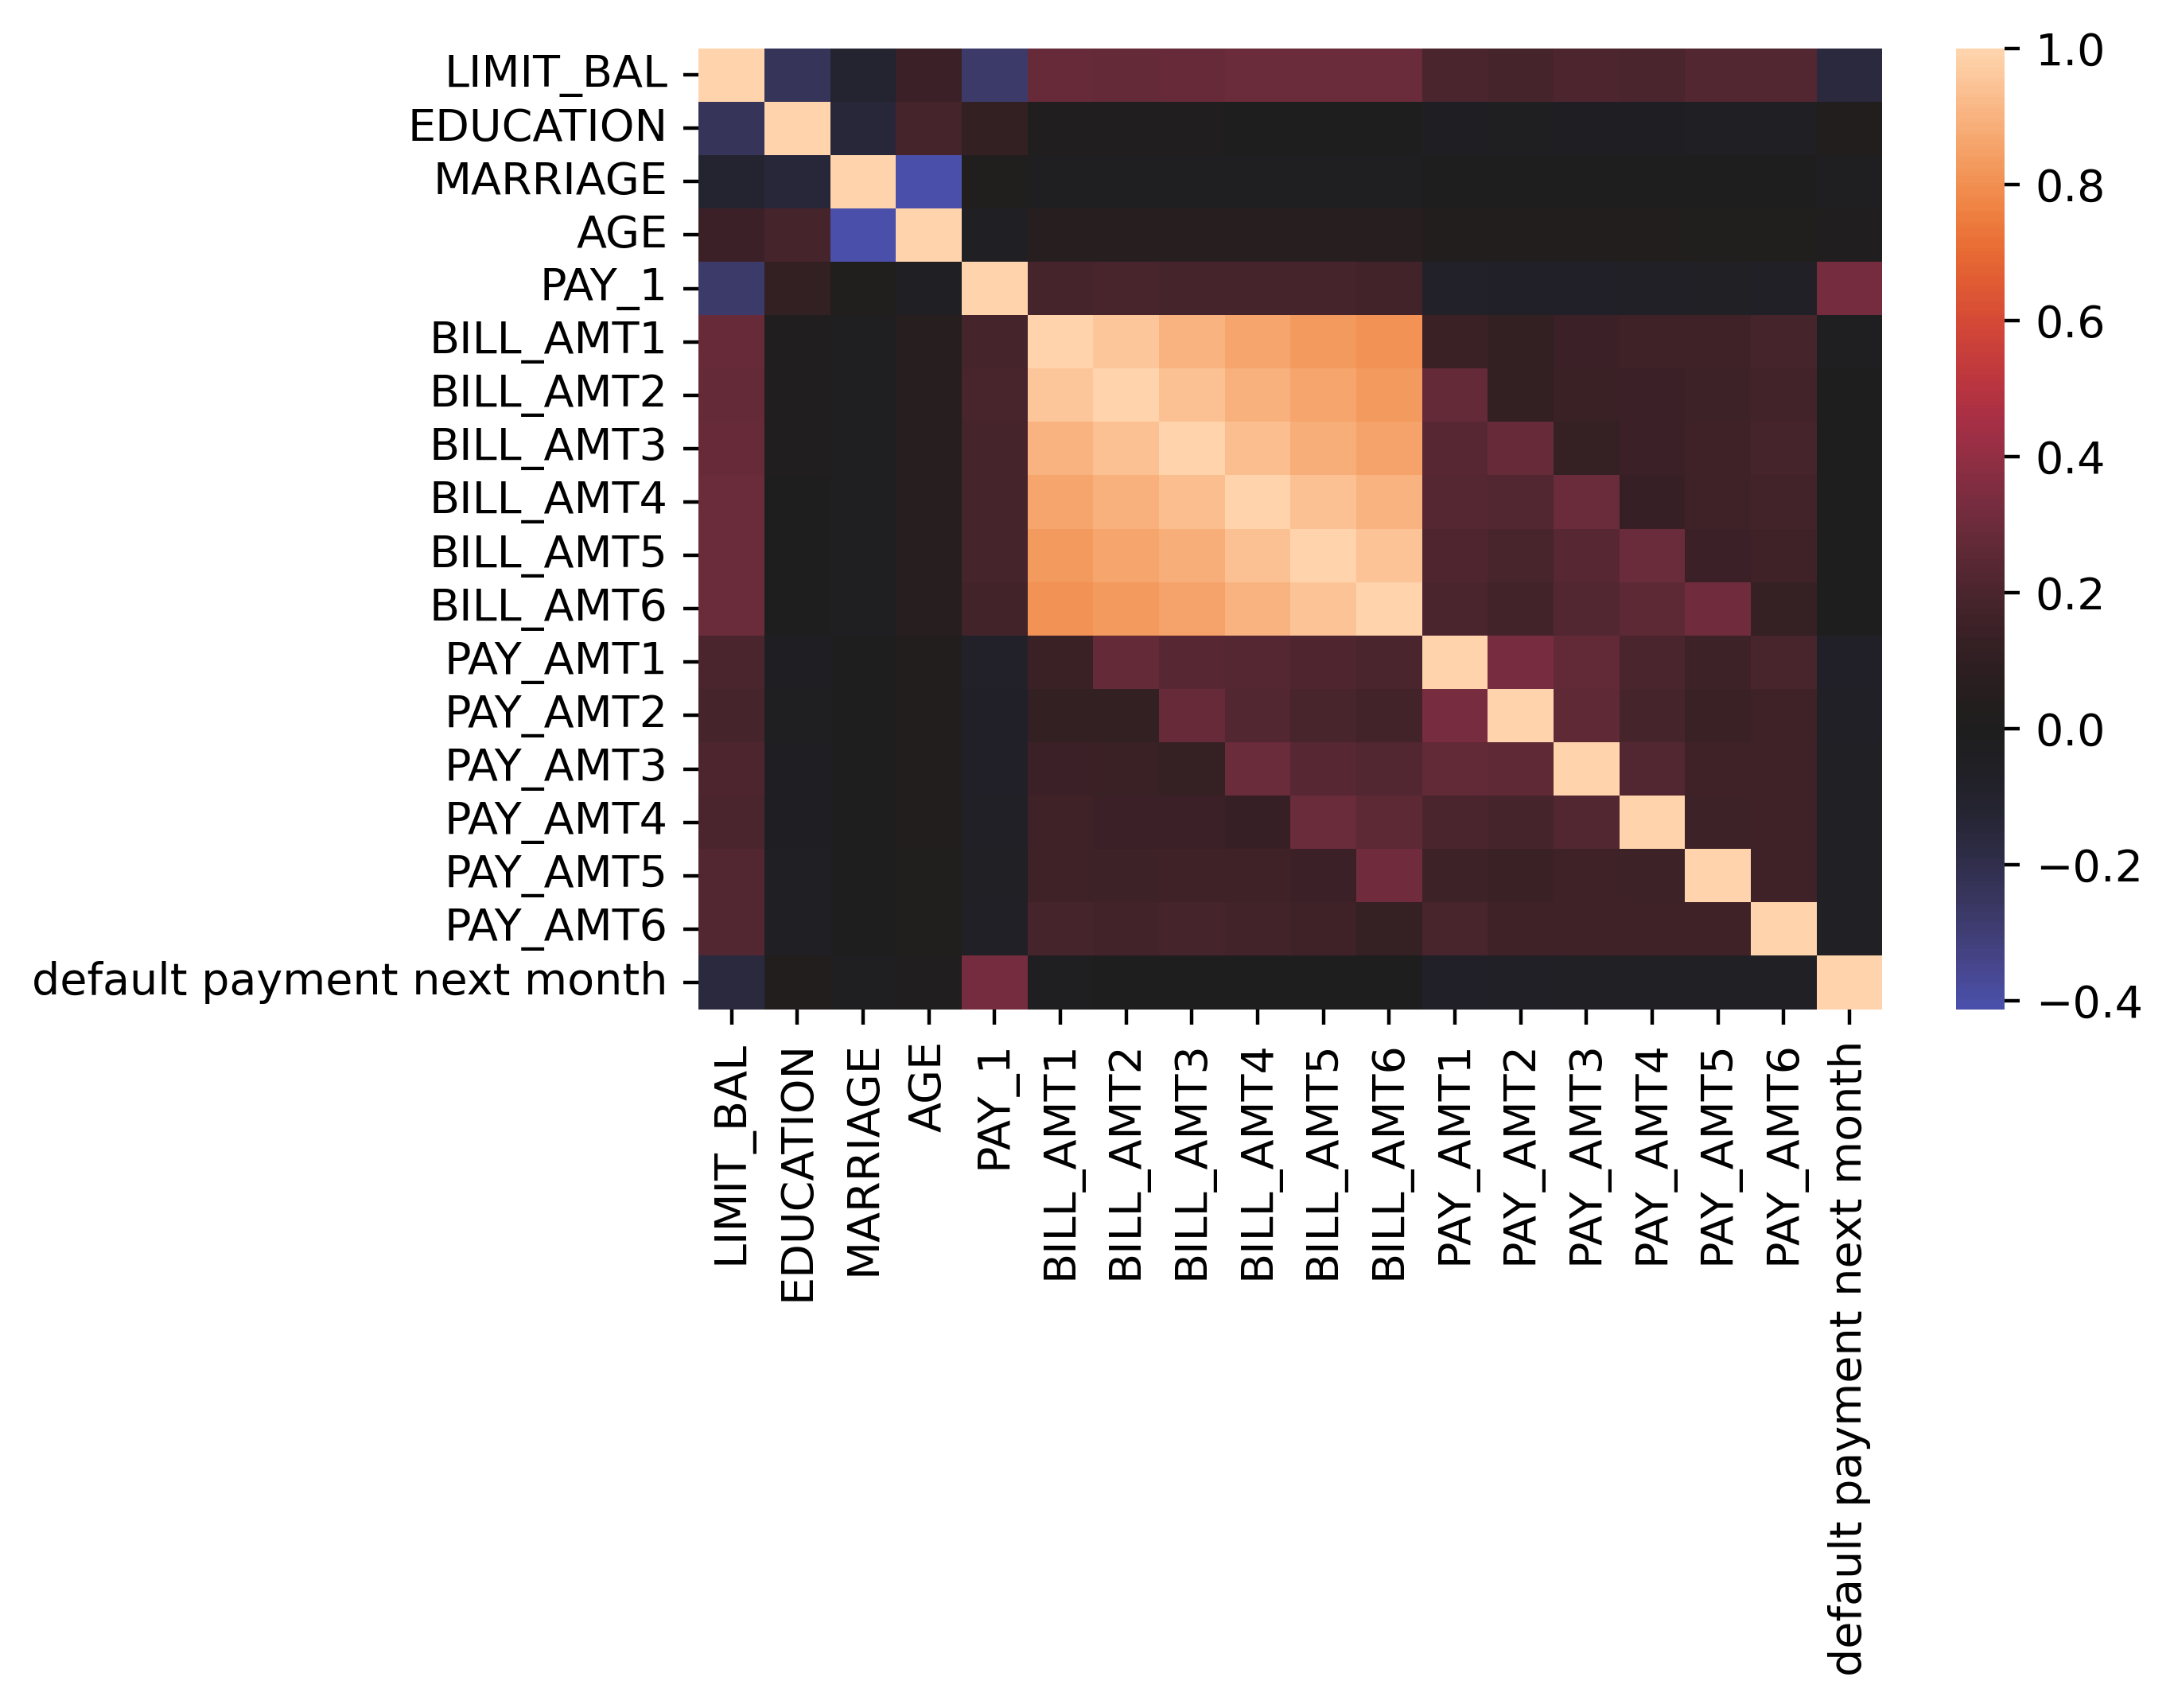

In [10]:
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           center=0)

### O heatmap do seaborn cria uma visualização clara da matriz de correlação, de acordo com a escala de cor que aparece à direita na figura acima, chamada de barra de cores. Os 'ticklabels' aqui nada mais são do que os eixos x e y que são as caracteristicas e o nome da resposta, além disso indicamos o centro da barra de cores deve ser 0 para que as corerelações positivas e negativas sejam distinguíveis como vermelha e azul respectivamente. 

### Em um nível geral, se duas caracteristicas ou uma caracteristica e a resposta estiverem altamente relacionadas, podemos dizer que há uma forte associação entre elas. Ou seja; as caracteristicas correlacionadas com a resposta serão úteis na previsão. essa alta correlção pode ser positiva ou negativa.

## Seleção de caracteristicas Univariada👇

### Executando teste F ANOVA (análise de variância)

In [11]:
# verificando o número de  caracteristicas e arrays
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [12]:
# importando a função f_classif para fornecer caracteristicas e respostas
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [13]:
#Criando um dataframe com nomes das caracteristicas com a estatistica F e com os valores -p e classificado pelo valor -p
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                         'F statistic':f_stat,
                         'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


### No scikit-learn, um dos usos para avaliações como o teste f, é na execução da seleção de caracteristicas univariada. Isso pode ser benefico se você tiver um númer muito grande de carcateristicas, varias talvez totalmente inuteis, e quiser uma forma rápida de obter uma "lista curta" com ad mais úteis.

In [14]:
# vamos selecionar as caracteristicas consideradas pelo teste F como as 20% melhores
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=20)

In [15]:
selector.fit(X,y)

SelectPercentile(percentile=20)

In [16]:
# capturando os indices das caracteristicas selecionadas em um array
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [17]:
# obtendo todos os nomes das carateristicas com excessão da variável de resposta
features = features_response[:-1]

In [18]:
best_features = [features[counter] for counter in range(len(features))
                if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

#### Quando usamos um teste F para examinar a diferença de media somente entre dois grupos, como fizemos aqui para o problema d classificaçao binaria do estudo de caso, na verdade o teste se resume ao que e conhecido como teste t. Um teste F é extensivel a 3 ou mais grupos e, portanto, e util para a clasificaçao multiclasse.

# Visualizando o relacionamento entre as carateristicas e a resposta

In [19]:
# Calculando a linha de base da variavel de resposta para a taxa de inadimplência de todo o dataset usando o método mean() do pandas
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [20]:
# criando um agregação groupby/mean de PAY1
group_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


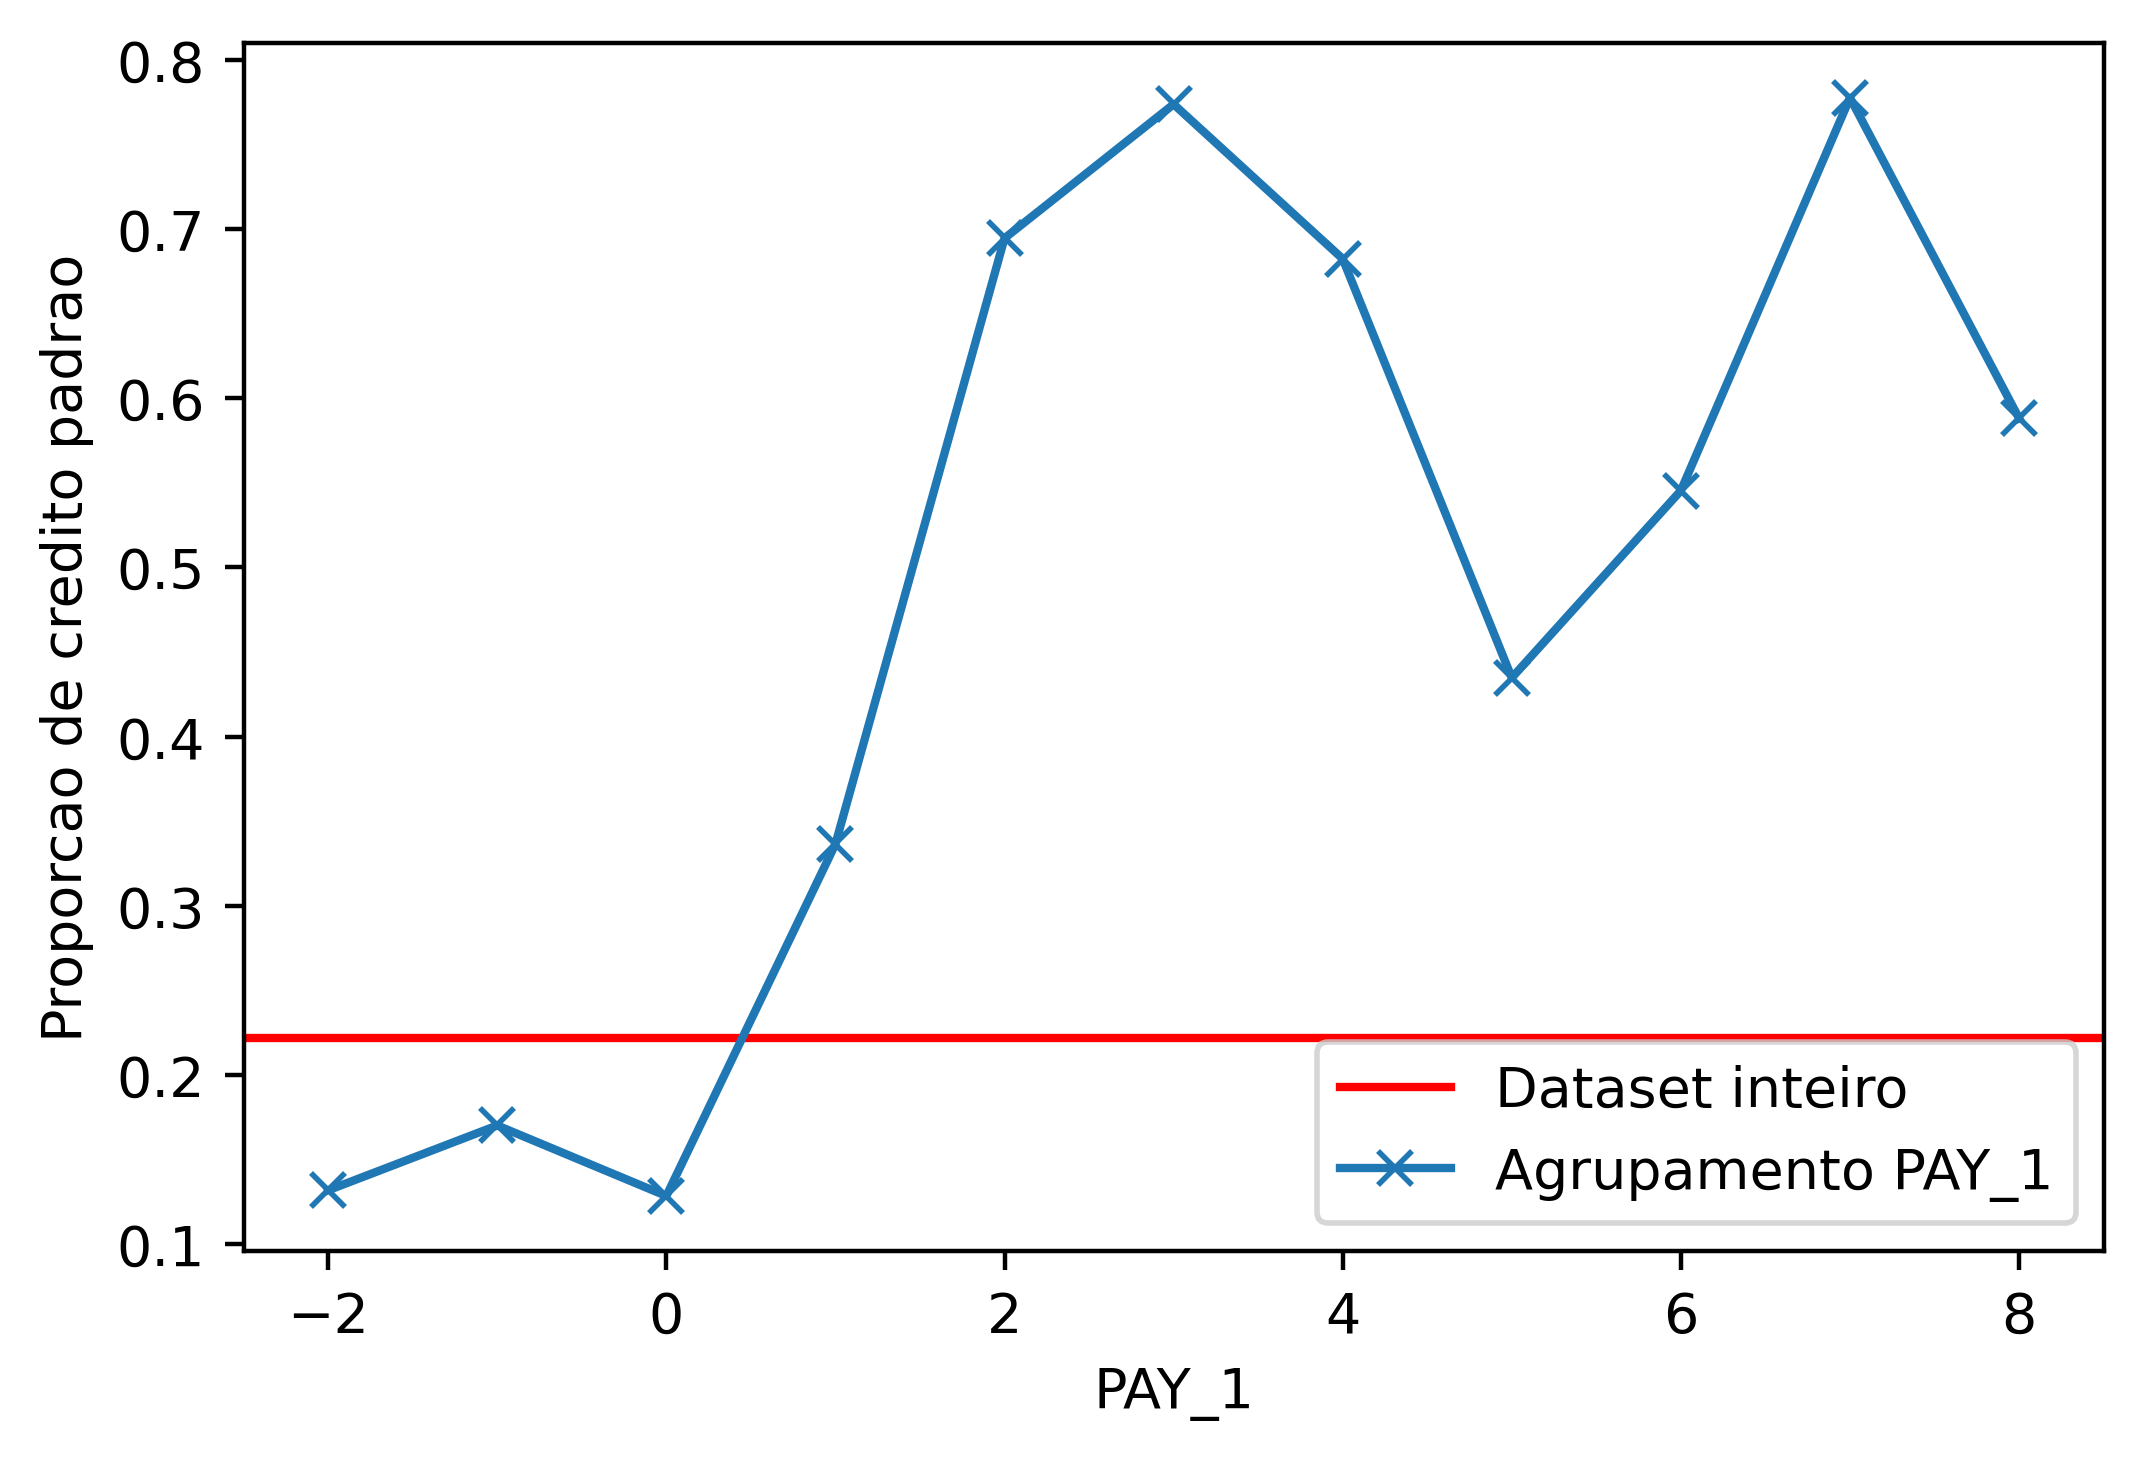

In [21]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proporcao de credito padrao')
axes.legend(['Dataset inteiro', 'Agrupamento PAY_1'])

#### A visualização é clara: quem já inadimpliu apresenta tendencia maior de fazê-lo novamente. A taxa de inadimplência  de contas em boa situação está bem abaixo da taxa geral, que sabemos que era de aproximadamente 22%. Essa é uma boa referencia visual para apresentarmos ao sócio da empresa já que mostra o efeito da caracteristica que talvez seja a mais importante do nosso modelo.

#### Agora criaremos mascaras logicas para amostras positivas e negativas👇

In [22]:
# Criando mascaras logicas
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Limite de Credito pela variavel de resposta')

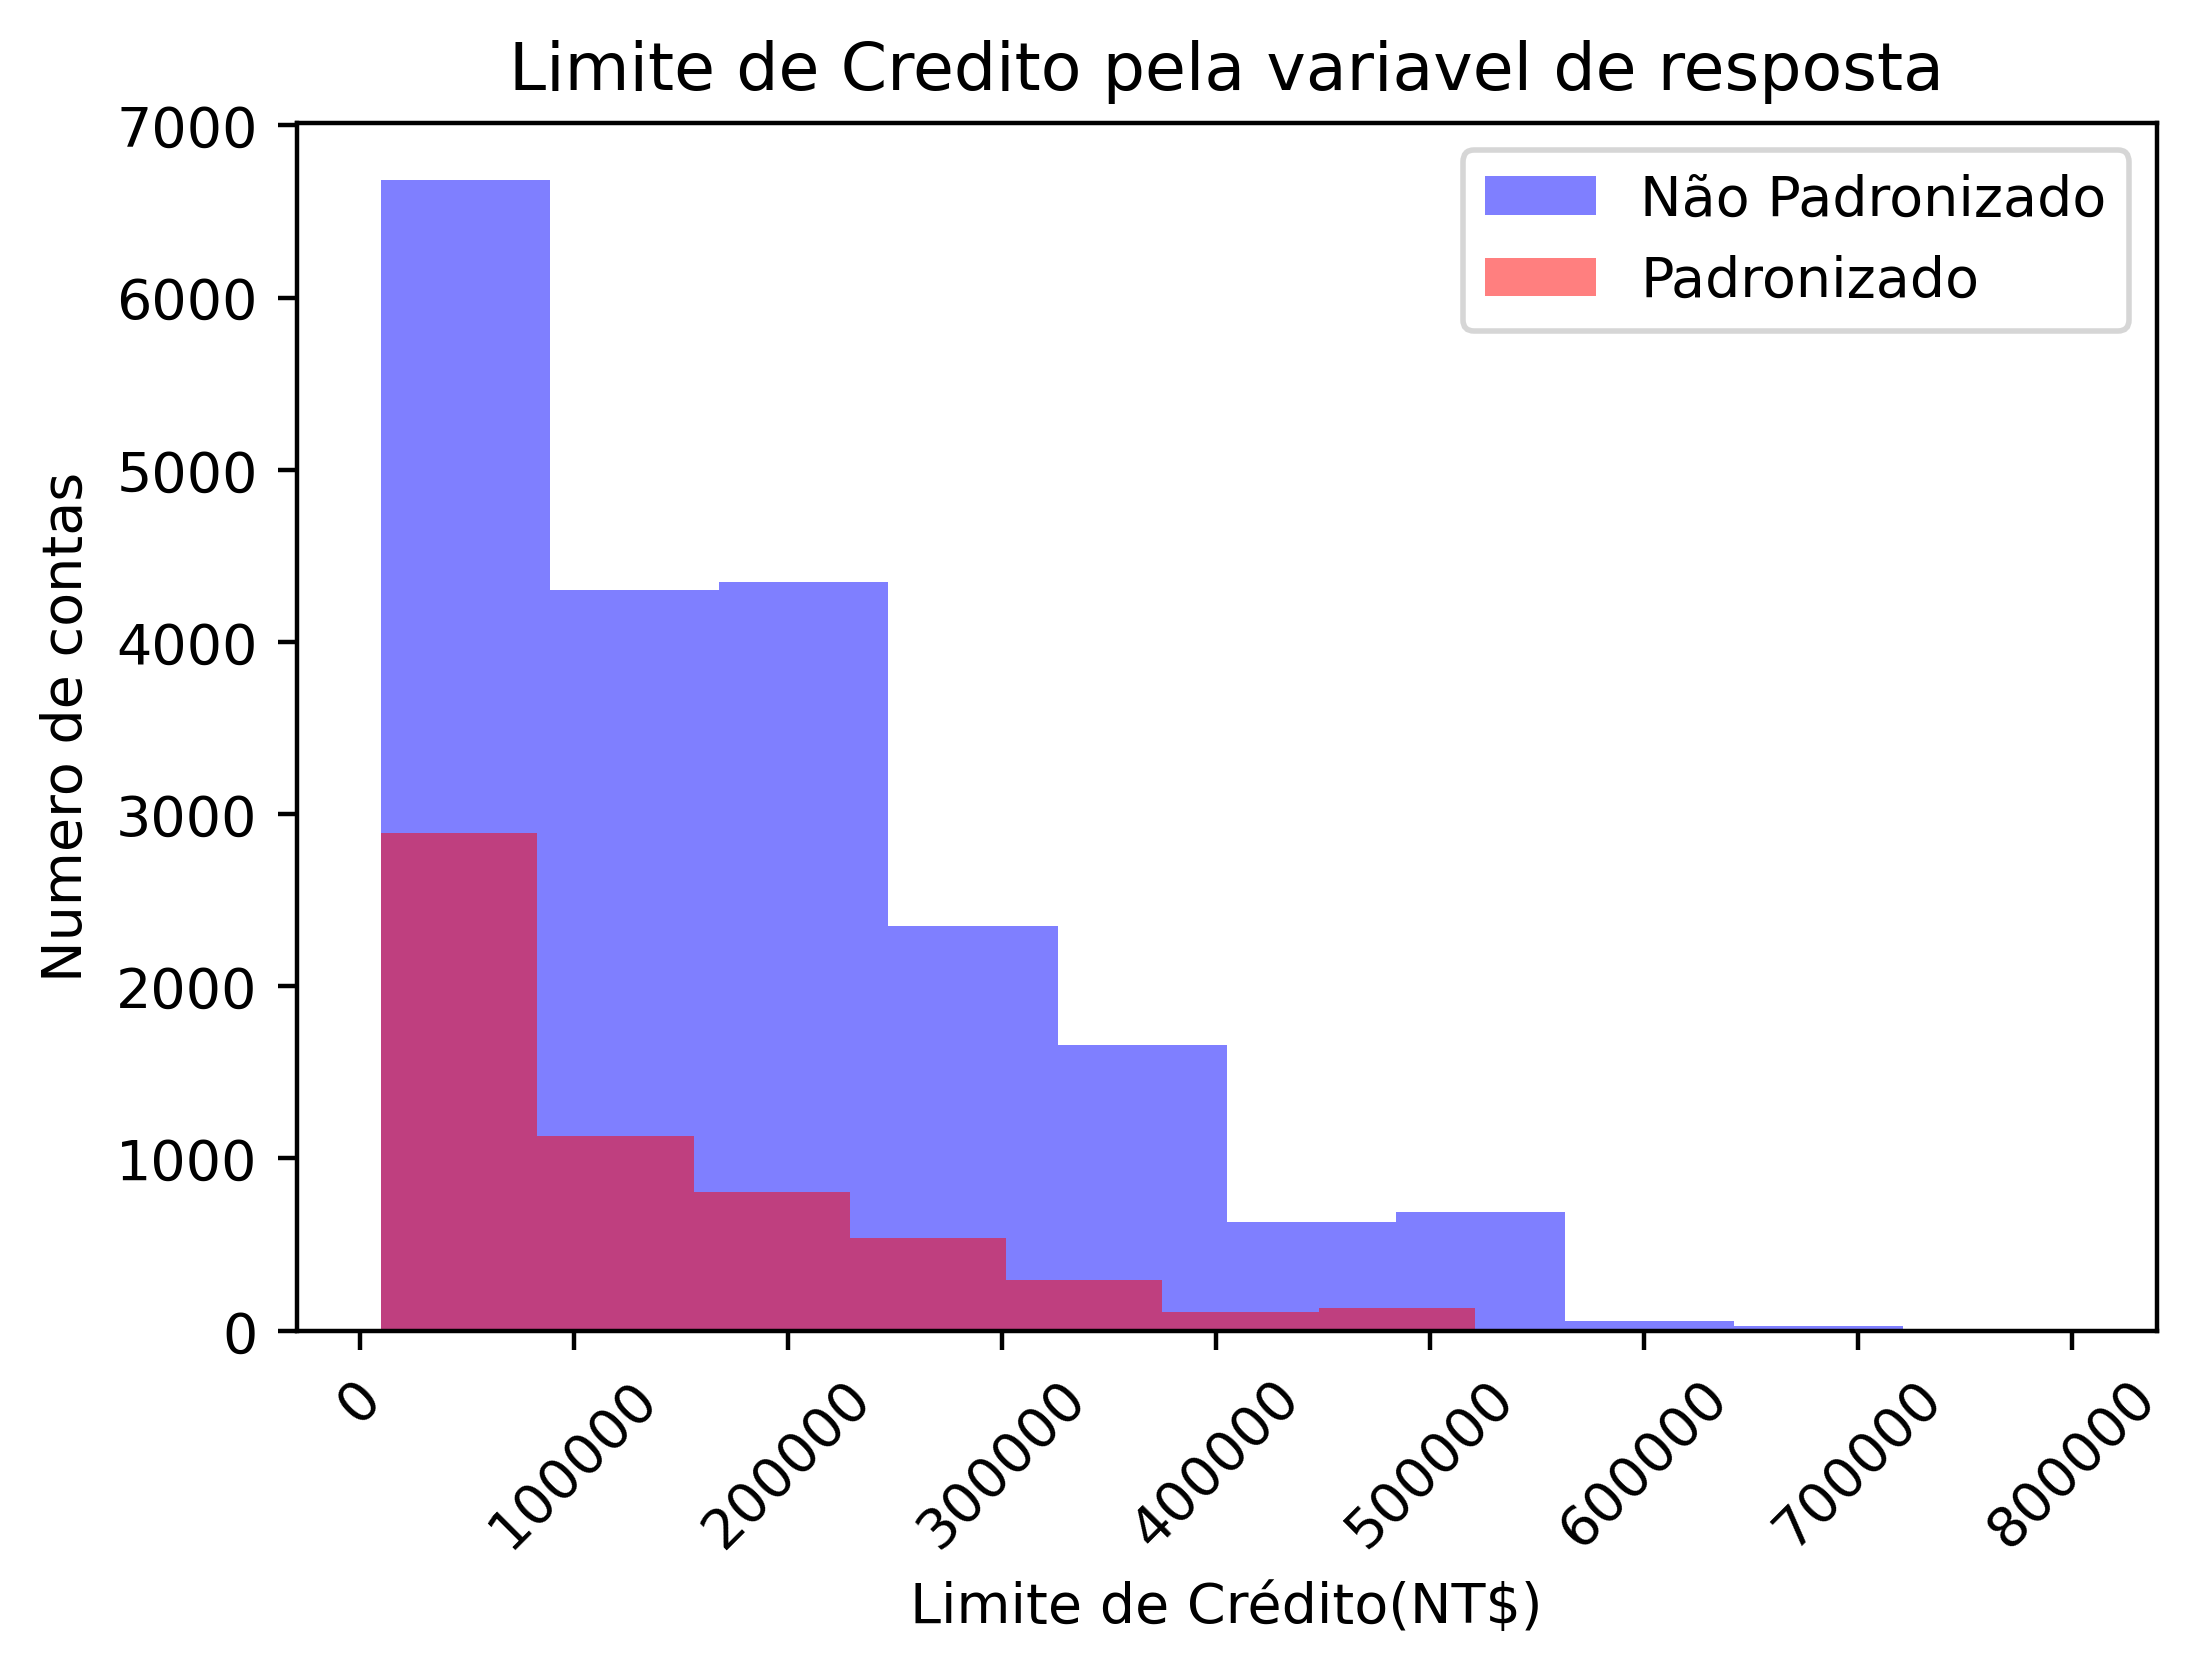

In [24]:
# criando plotagem de histograma dupla com as propriedades mencionadas
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Limite de Crédito(NT$)')
axes.set_ylabel('Numero de contas')
axes.legend(['Não Padronizado', 'Padronizado'])
axes.set_title('Limite de Credito pela variavel de resposta')

##### Embora a plotagem acima tenha ficado com a formatação desejada, ela não é tão explicativa como poderia. Queríamos olhar para ela e constatar que o limite de crédito pode ser uma boa maneira de diferenciar as contas inadimplentes das que não inadimplirão. No entanto, nosa principal percepção visual é a de que o histograma verde é maior so que o vermelho. Isso ocorre porque há menos contas inadimplentes.

##### Seria mais informativo exibir algo sobre como as formas desses histogramas são diferentes, e não apenas seus tamanhos. Para isso criaremos a versão empirica de uma função de densidade de probabilidade. Isso significa que a integral, ou a area contida dentro de cada histograma será igual a1 após a normalizaçao, ja que  as probabilidades resultam em 1.

In [25]:
#criando um histograma com 16 bins
bin_edge = list(range(0,850000,50000))
print(bin_edge[-1])

800000


C:\Users\gil26\AppData\Local\Temp/ipykernel_7592/971691656.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Distribuicao normal dos limites de credito pela variavel de resposta')

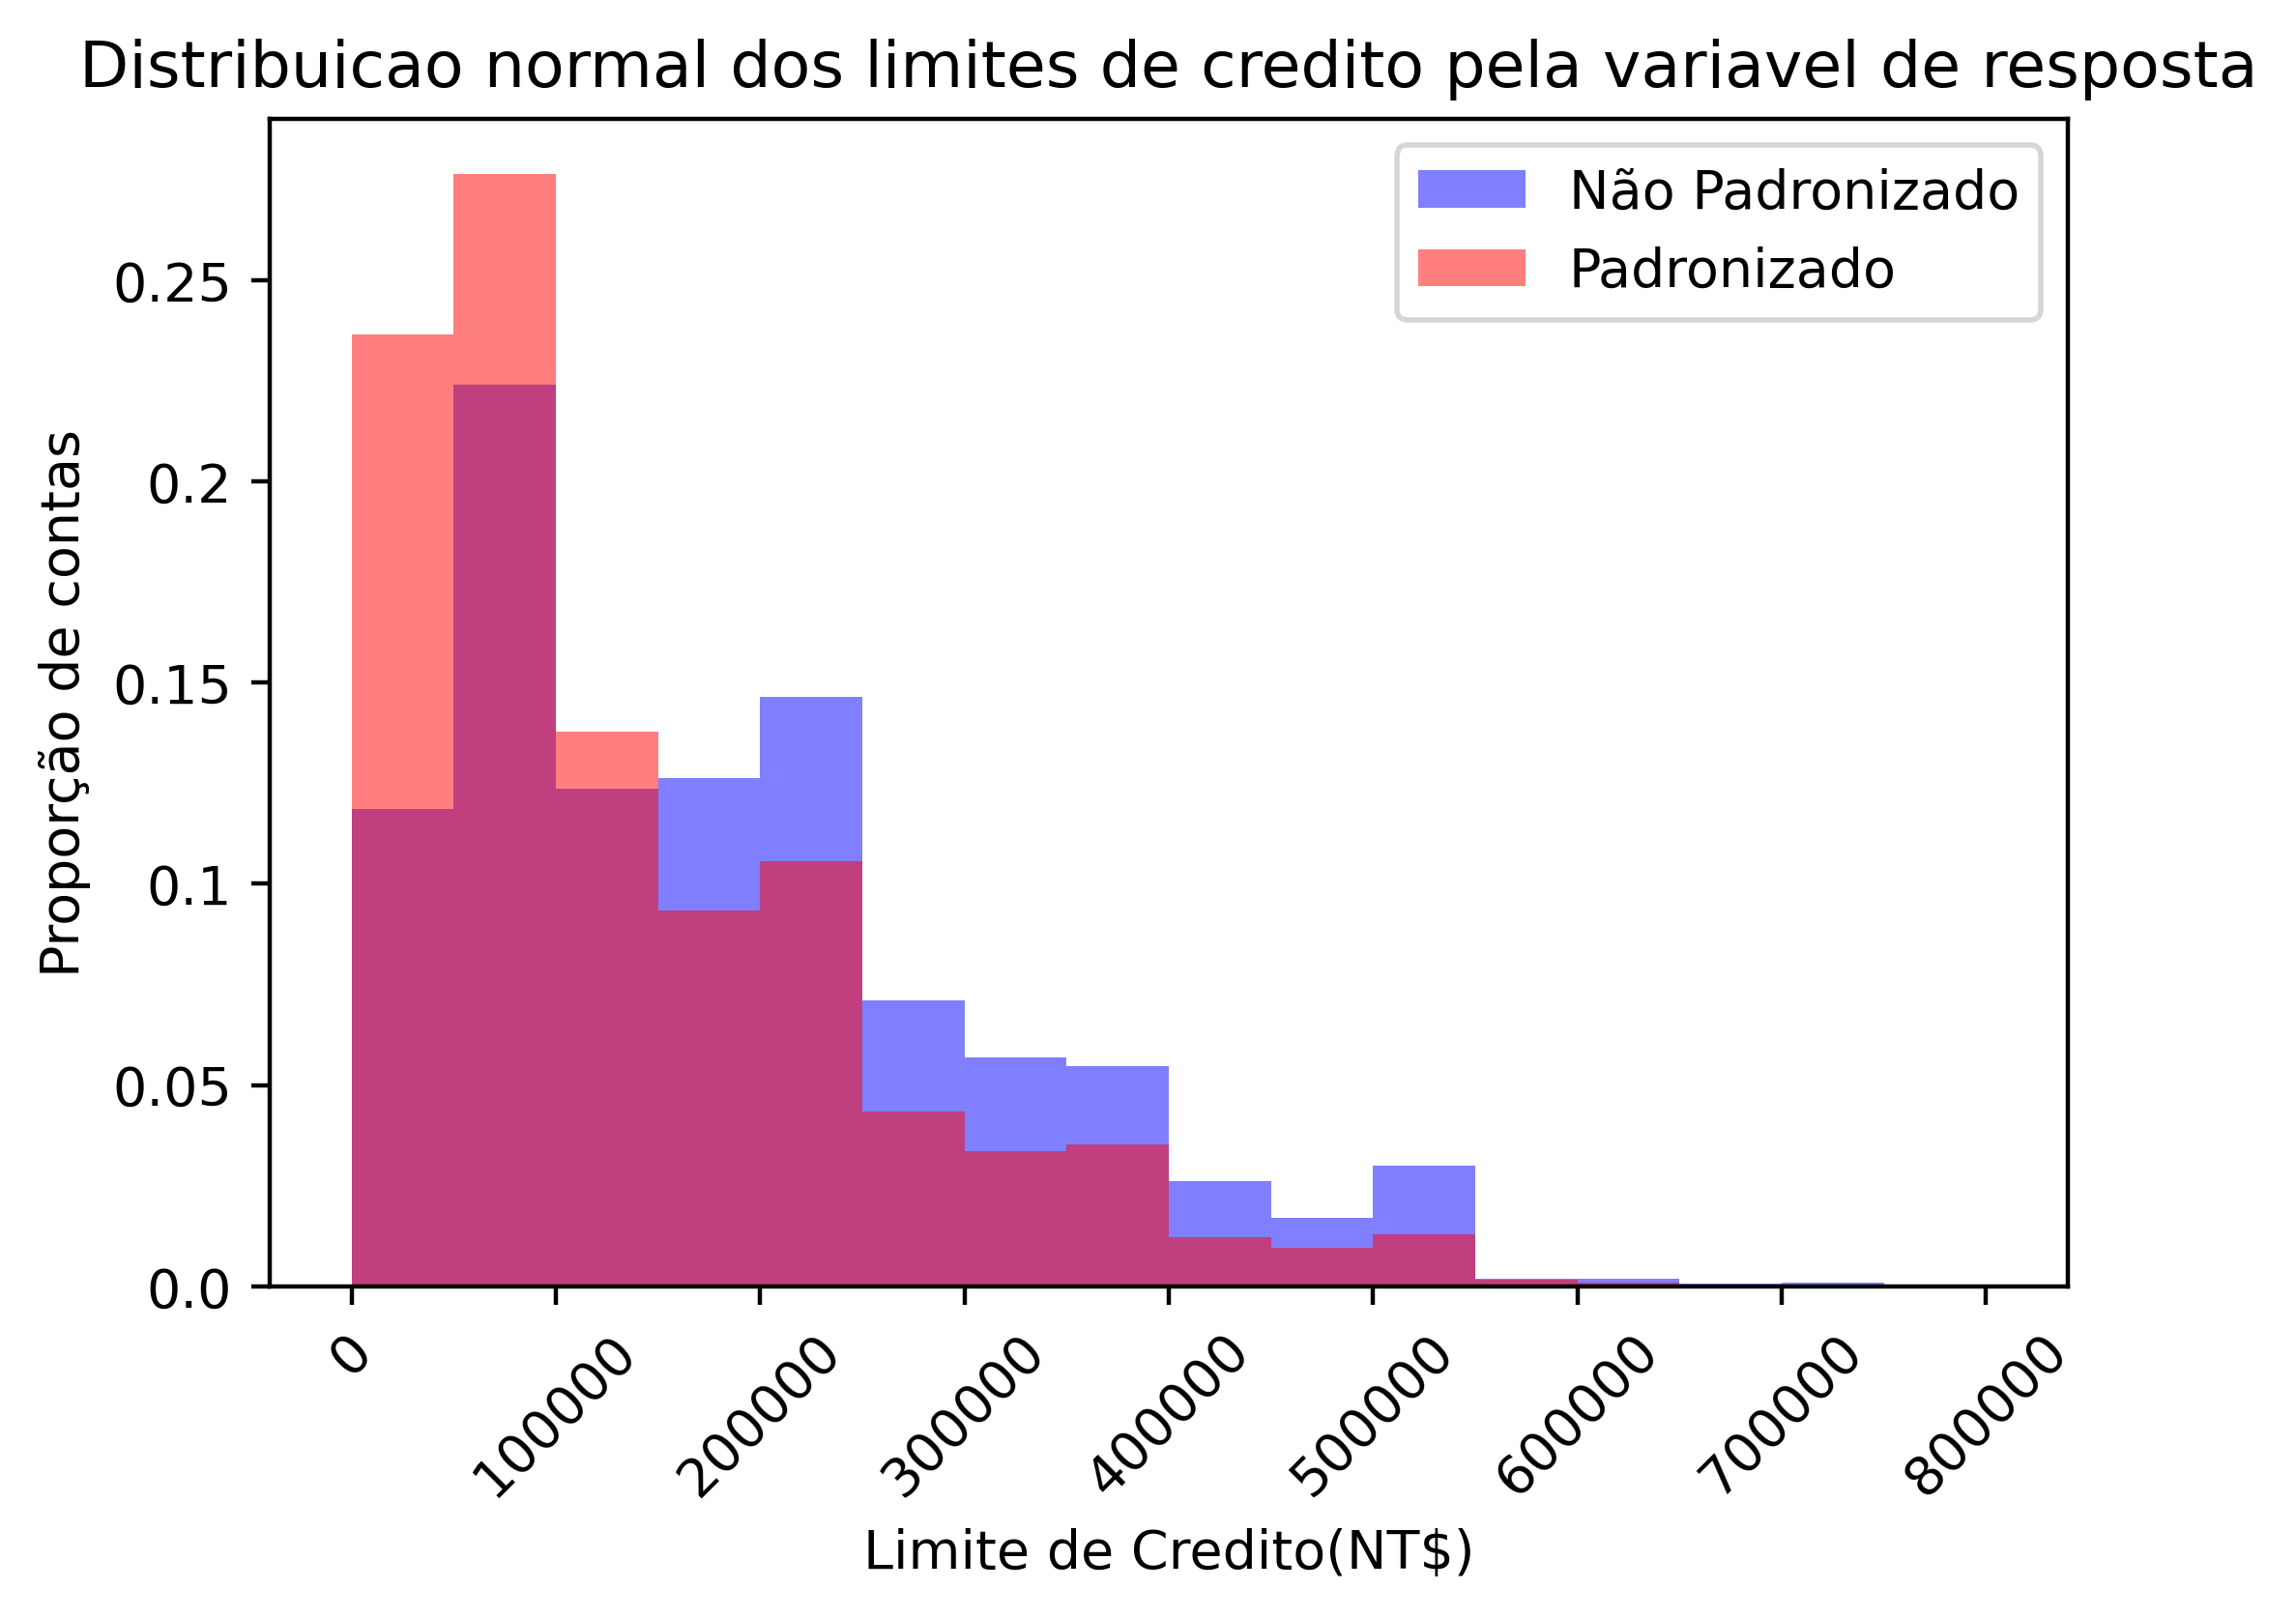

In [26]:
mpl.rcParams['figure.dpi'] = 400
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edge,
         alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edge,
         alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Limite de Credito(NT$)')
axes.set_ylabel('Proporção de contas')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Não Padronizado', 'Padronizado'])
axes.set_title('Distribuicao normal dos limites de credito pela variavel de resposta')

#### O que podemos extrair dessa plotagem?

#### Parece que as contas inadimplentes tendem a ter uma proporção maior de limites de credito menores. Nossa hipotese era de que o cliente daria limites menores a contas que apresentassem maior risco.

#### A comunicação visual de conceitos quantitativos é uma habilidade-chave da ciencia de dados

# Fim...por enquanto...